# Travel Package Purchase
*by: Garey Salinas*

----

<a id=top></a>
## Table of Contents

- [Overview of Dataset](#overview)
- [Exploratory Data Analysis](#eda)
- [Data Preprocessing](#preprocessing)
- [Splitting Data](#splitting)
- [Model Building](#modelbuilding)
- [Decision Tree Classifier](#decisiontree)
- [Random Forest Classifier](#randomforest)
- [Bagging Classifier](#bagging)
- [AdaBoost Classifier](#boosting)
- [Gradient Boosting Classifier](#gradientboosting)
- [XGBoost Classifier](#xgboost)
- [Stacking Models](#stacking)
- [Comparing Models](#comparing)
- [Conclusion](#conclusion)

----

## Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base. A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. 

----

## Problem Statement

The company is now planning to launch a new product i.e. **Wellness Tourism Package**. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

----

## Objective

- To predict which customer is more likely to purchase the newly introduced travel package.

----

## Data Dictionary

|LABELS|DESCRIPTION|
|------|:----------|
|CustomerID|Unique customer ID|
|ProdTaken|Whether the customer has purchased a package or not (0: No, 1: Yes)|
|Age|Age of customer|
|TypeofContact|How customer was contacted (Company Invited or Self Inquiry)|
|CityTier|City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3|
|Occupation|Occupation of customer|
|Gender|Gender of customer|
|NumberOfPersonVisiting|Total number of persons planning to take the trip with the customer|
|PreferredPropertyStar|Preferred hotel property rating by customer|
|MaritalStatus|Marital status of customer|
|NumberOfTrips|Average number of trips in a year by customer|
|Passport|The customer has a passport or not (0: No, 1: Yes)|
|OwnCar|Whether the customers own a car or not (0: No, 1: Yes)|
|NumberOfChildrenVisiting|Total number of children with age less than 5 planning to take the trip with the customer|
|Designation|Designation of the customer in the current organization|
|MonthlyIncome|Gross monthly income of the customer|
|PitchSatisfactionScore|Sales pitch satisfaction score|
|ProductPitched|Product pitched by the salesperson|
|NumberOfFollowups|Total number of follow-ups has been done by the salesperson after the sales pitch|
|DurationOfPitch|Duration of the pitch by a salesperson to the customer|

----

<a id=overview></a>
## <span style="color:blue">Overview of Dataset</span>
<div style="text-align:right"><a href=#top>top</a></div>

### Import libraries

In [1]:
# To install xgboost library use:
# !pip install xgboost 
# or
# conda install -c conda-forge xgboost

In [2]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, 
                             precision_score, recall_score, f1_score, make_scorer)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier, StackingClassifier)
from sklearn.model_selection import GridSearchCV, train_test_split

%matplotlib inline
sns.set()

### Load dataset

In [3]:
data = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")
df = data.copy()

### Shape of  dataset

In [4]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 4888 rows and 20 columns.


### Head, tail and random sample of dataset

In [5]:
pd.concat([df.head(), df.sample(5), df.tail()])

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
1656,201656,0,40.0,Self Enquiry,1,10.0,Small Business,Female,2,3.0,King,3.0,Married,2.0,0,5,1,1.0,VP,34033.0
387,200387,0,40.0,Self Enquiry,3,8.0,Small Business,Female,2,3.0,Deluxe,4.0,Married,1.0,0,2,0,1.0,Manager,20715.0
1614,201614,0,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,1,0,1.0,Manager,19668.0
3066,203066,0,33.0,Self Enquiry,3,20.0,Salaried,Male,4,4.0,Deluxe,3.0,Married,4.0,0,2,0,1.0,Manager,23081.0
2128,202128,0,44.0,Self Enquiry,1,15.0,Salaried,Male,3,3.0,Basic,5.0,Married,2.0,1,3,1,0.0,Executive,17559.0


### Dataset columns

In [6]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- Change object types to category types

In [8]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')
df.dtypes

CustomerID                     int64
ProdTaken                      int64
Age                          float64
TypeofContact               category
CityTier                       int64
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar        float64
MaritalStatus               category
NumberOfTrips                float64
Passport                       int64
PitchSatisfactionScore         int64
OwnCar                         int64
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

- confirming change to dtypes

### Describe dataset

In [9]:
df.describe(include='float').T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


- Age has a mean of about 38 with a standard deviation of 9.3. Age looks to have missing values.
- DurationOfPitch has extreme outliers with max of 127 and 20 in the upper 75% quantile. May need to handle extreme outliers. Has missing values.
- NumberOfTrips has extreme outlier with 4 being the upper quantile and 22 at the max. Will clip extreme outliers. Has missing values
- Monthly Income has mean of 23,619 and a standard deviation of 5380. looks to be right skewed with 25,271 in the 75% quantile and 98,678 as the max value.

In [10]:
df.describe(include='integer').T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.00,3.0,4.00,5.0
OwnCar,4888.0,0.620295,0.485363,0.0,0.00,1.0,1.00,1.0


- No missing values in all integer type columns. 
- ProdTaken, Passport, and OwnCar are binary. 
- We will drop CustomerID.

In [11]:
try:
    df.drop(['CustomerID'], axis=1, inplace=True)
except:
    print("Column already dropped.")
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [12]:
df.describe(include='category').T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


**Observations**
- The TypeOfContact has a few missing values with the top most frequent being "Self Inquiry".
- Occupation has zero missing values and can represent 4 different values.
- Gender has zero missing values and can represent 3 different values. 
- ProductPitched has zero missing values and can represent 5 different values with "Male" being the most frequent. 
- MaritialStatus has zero missing values and can represent 5 values with basic being the most frequent. 
- Designation has zero missing values and can represent 5 different values with "Executive" being the most frequent.

### Show missing value count

In [13]:
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
MaritalStatus                 0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [14]:
numerical_feature_df = df.select_dtypes(include=['int64','float64'])
numerical_feature_df.skew()

ProdTaken                   1.595763
Age                         0.382989
CityTier                    0.736531
DurationOfPitch             1.752037
NumberOfPersonVisiting      0.029817
NumberOfFollowups          -0.372719
PreferredPropertyStar       0.895545
NumberOfTrips               1.453884
Passport                    0.920980
PitchSatisfactionScore     -0.127726
OwnCar                     -0.495892
NumberOfChildrenVisiting    0.272199
MonthlyIncome               1.949160
dtype: float64

### Show value counts of categorical variables.

In [15]:
def show_values(data=df):
    cat_cols = data.select_dtypes(include='category').columns
    for col in cat_cols:
        print("FEATURE: ", col)
        print("="*50)
        print(df[col].value_counts(dropna=False), "\n")   
        
show_values()

FEATURE:  TypeofContact
Self Enquiry       3444
Company Invited    1419
NaN                  25
Name: TypeofContact, dtype: int64 

FEATURE:  Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64 

FEATURE:  Gender
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64 

FEATURE:  ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64 

FEATURE:  MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64 

FEATURE:  Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64 



 - We will fix the values with Fe Male to 'Female' in gender column
 - Condense Maritial Status to Married and Unmarried.

### Replacing values in Gender and MaritalStatus columns

In [16]:
df.Gender.replace('Fe Male','Female', inplace=True)
df.Gender.value_counts().sort_values(ascending=False)

Male      2916
Female    1972
Name: Gender, dtype: int64

In [17]:
df.MaritalStatus.replace(['Single', 'Divorced'], 'Unmarried', inplace=True)
df.MaritalStatus.value_counts().sort_values(ascending=False)

Unmarried    2548
Married      2340
Name: MaritalStatus, dtype: int64

- The values in the Gender and MaritalStatus columns were processed.

In [18]:
missing_df = pd.DataFrame({"% of Missing Values": round(df.isna().sum() / df.isna().count() * 100, 2)})
missing_df.sort_values(by='% of Missing Values', ascending=False)

,% of Missing Values
DurationOfPitch,5.14
MonthlyIncome,4.77
Age,4.62
NumberOfTrips,2.86
NumberOfChildrenVisiting,1.35
NumberOfFollowups,0.92
PreferredPropertyStar,0.53
TypeofContact,0.51
Designation,0.00
OwnCar,0.00


In [19]:
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts().sort_values(ascending=False)

0    4128
1     533
2     202
3      25
dtype: int64

- There are 4128 rows without missing values. We will drop all rows with missing values from dataset.

In [20]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0], "\n")

For the rows with exactly 1 missing values, NAs are found in:
Age                          96
DurationOfPitch             154
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome                 6
dtype: int64 

For the rows with exactly 2 missing values, NAs are found in:
Age                130
DurationOfPitch     72
MonthlyIncome      202
dtype: int64 

For the rows with exactly 3 missing values, NAs are found in:
TypeofContact      25
DurationOfPitch    25
MonthlyIncome      25
dtype: int64 



### Dropping those observations with a missing value.

In [21]:
#df.drop(df[num_missing>1].index, axis=0, inplace=True)
df.dropna(how='any', inplace=True)
print(f"We have {df.shape[0]} observations after dropping those rows with a missing feature.")

We have 4128 observations after dropping those rows with a missing feature.


----

<a id=eda></a>
## <span style="color:blue">Exploratory Data Analysis</span>
<div style="text-align:right"><a href=#top>top</a></div>

### Univariate Analysis

In [22]:
def histogram_boxplot(feature, figsize=(15, 7), bins=None):
    """ 
    Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-');# Add median to the histogram

In [23]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data, palette='mako')
    
    total = len(feature) # length of the column
    for p in ax.patches:
        # percentage of each class of the category
        percentage = 100 * p.get_height()/total
        percentage_label = f"{percentage:.1f}%"
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage_label, (x, y), size = 12) # annotate the percantage
        
    plt.show() # show the plot

In [24]:
def outliers(feature: str, data=df):
    """ 
    Returns dataframe object of feature outliers.
    feature: 1-d feature array
    data: pandas dataframe (default is df)
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    #print(((df.Mileage < (Q1 - 1.5 * IQR)) | (df.Mileage > (Q3 + 1.5 * IQR))).sum())
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

### Age

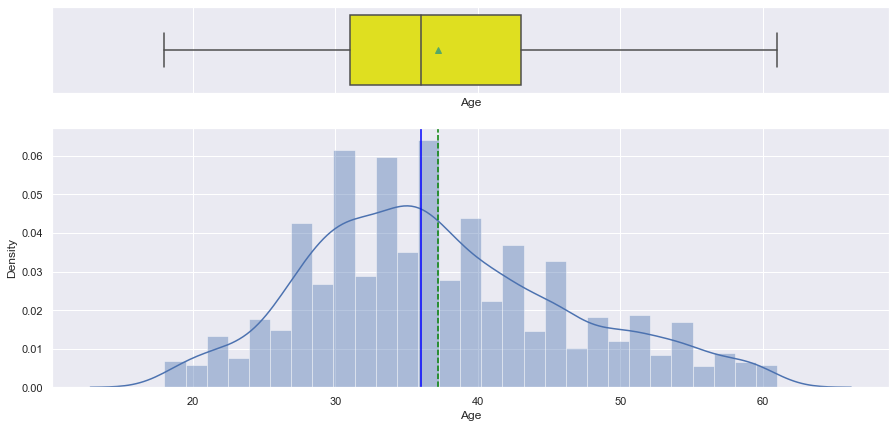

In [25]:
histogram_boxplot(df.Age)

- Age column has a median of about 37 and a mean of 38. The distribtion is slightly right skewed and has zero outliers.

### DurationOfPitch

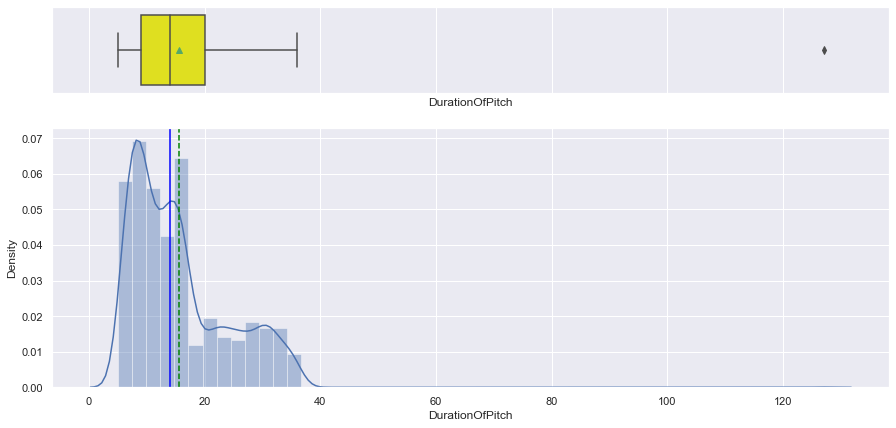

In [26]:
histogram_boxplot(df.DurationOfPitch);

In [27]:
df_outliers = outliers('DurationOfPitch')
print("Number of outliers:", df_outliers.shape[0])
df_outliers

Number of outliers: 1


,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


- The DurationOfPitch column has one extreme outlier. We will drop this extreme outlier.

In [28]:
df.drop(df_outliers.index, inplace=True)
df.DurationOfPitch.nlargest()

2505    36.0
2585    36.0
2643    36.0
2648    36.0
2703    36.0
Name: DurationOfPitch, dtype: float64

In [29]:
print(f"There are {df.shape[0]} rows in dataset now.")

There are 4127 rows in dataset now.


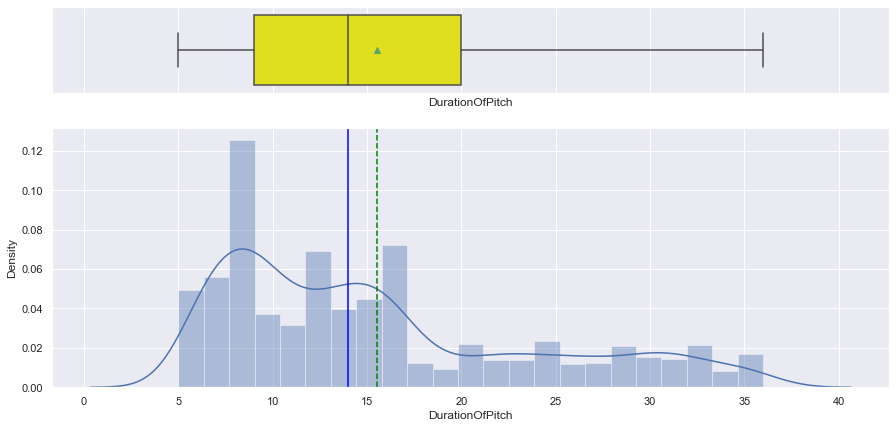

In [30]:
histogram_boxplot(df.DurationOfPitch);

### NumberOfTrips

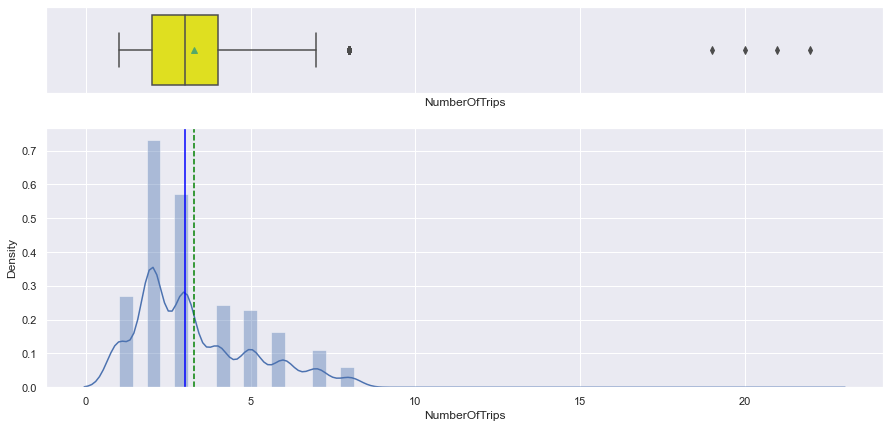

In [31]:
histogram_boxplot(df.NumberOfTrips)

In [32]:
df.NumberOfTrips.nlargest()

3260    22.0
816     21.0
2829    20.0
385     19.0
2446     8.0
Name: NumberOfTrips, dtype: float64

- The mean and median values are similar with values of about ~3. There are 4 outliers in the range of 8 to 21 trips.
- We will drop these extreme outliers.

In [33]:
df = df[df.NumberOfTrips < 9]
assert df.NumberOfTrips.max() < 9

In [34]:
print(f"There are {df.shape[0]} rows in dataset now.")

There are 4123 rows in dataset now.


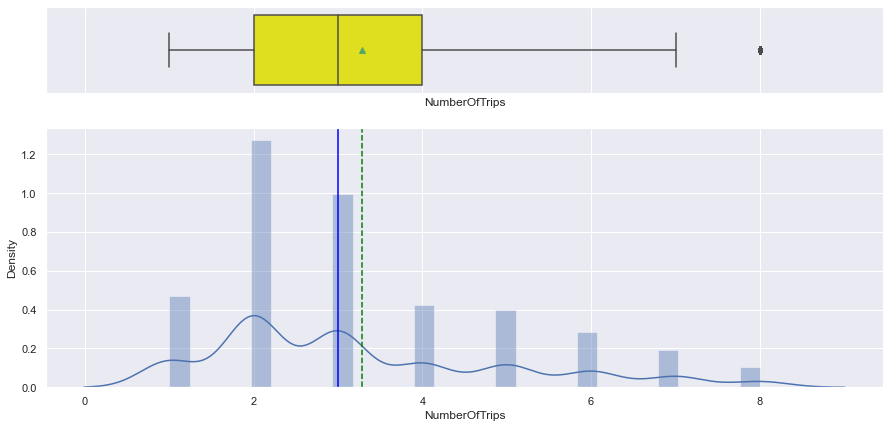

In [35]:
histogram_boxplot(df.NumberOfTrips);

### MonthlyIncome

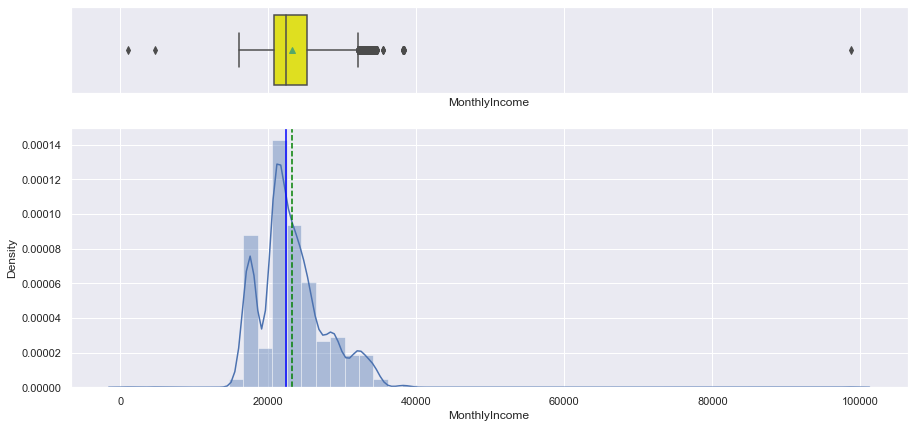

In [36]:
histogram_boxplot(df.MonthlyIncome)

In [37]:
print(df.MonthlyIncome.nlargest())
df.MonthlyIncome.nsmallest()

2482    98678.0
3258    38304.0
4728    38304.0
3573    38291.0
3560    38264.0
Name: MonthlyIncome, dtype: float64


142      1000.0
2586     4678.0
513     16009.0
1983    16009.0
727     16051.0
Name: MonthlyIncome, dtype: float64

### Dropping the extreme outliers in the `MonthlyIncome` column

In [38]:
df = df[df.MonthlyIncome < 40000]
assert df.MonthlyIncome.max() < 40000

df = df[df.MonthlyIncome > 16000]
assert df.MonthlyIncome.min() > 16000 

In [39]:
print(f"There are {df.shape[0]} rows in dataset now.")

There are 4120 rows in dataset now.


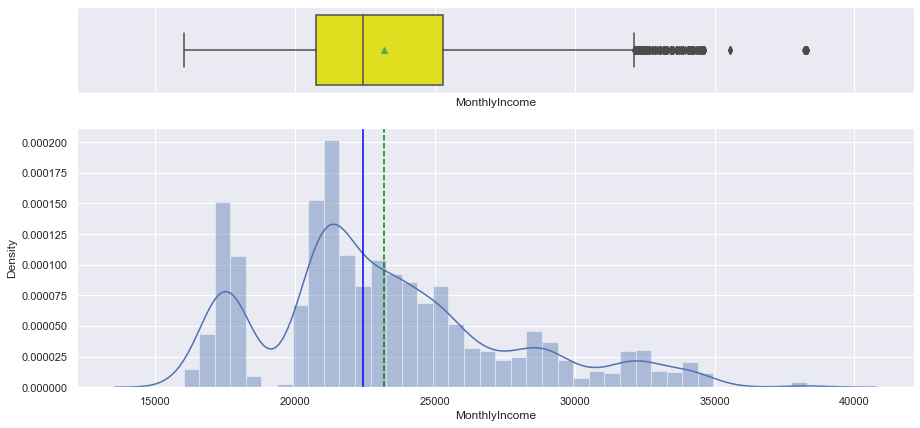

In [40]:
histogram_boxplot(df.MonthlyIncome);

### ProdTaken

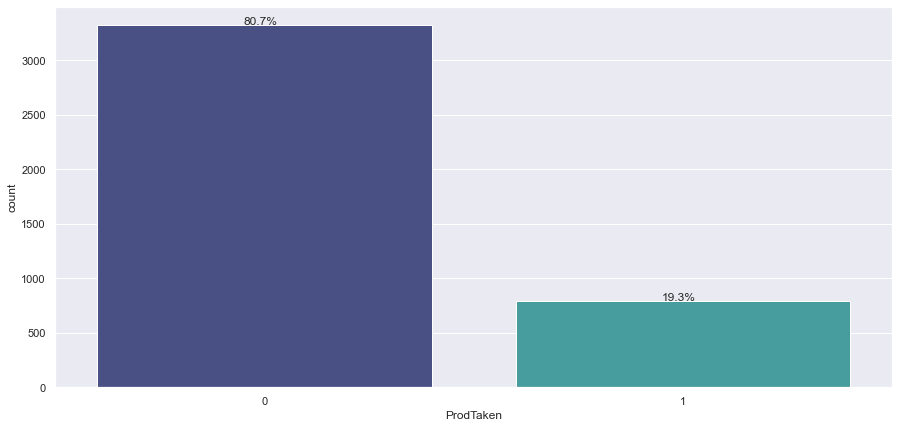

In [41]:
perc_on_bar(df.ProdTaken)

- Only 19.3% have taken the product. 81% haven't taken the product.

### TypeOfContact

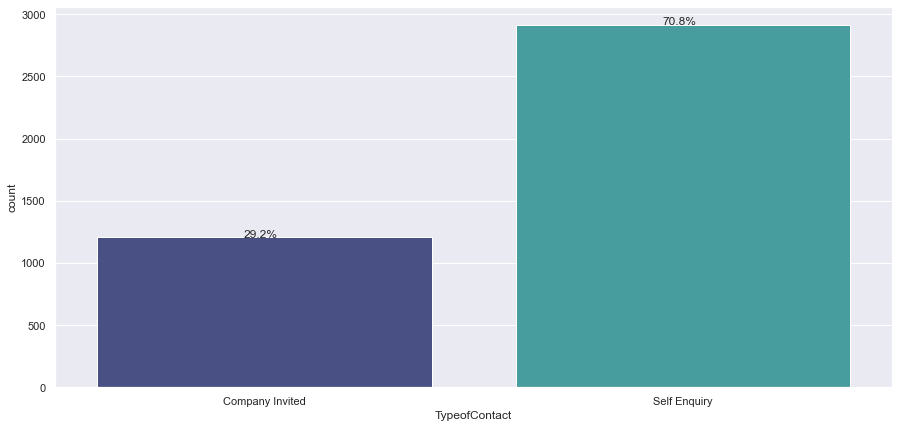

In [42]:
perc_on_bar(df.TypeofContact)

- About 29% were company invited and 71.2% were self enquiry.

### CityTier

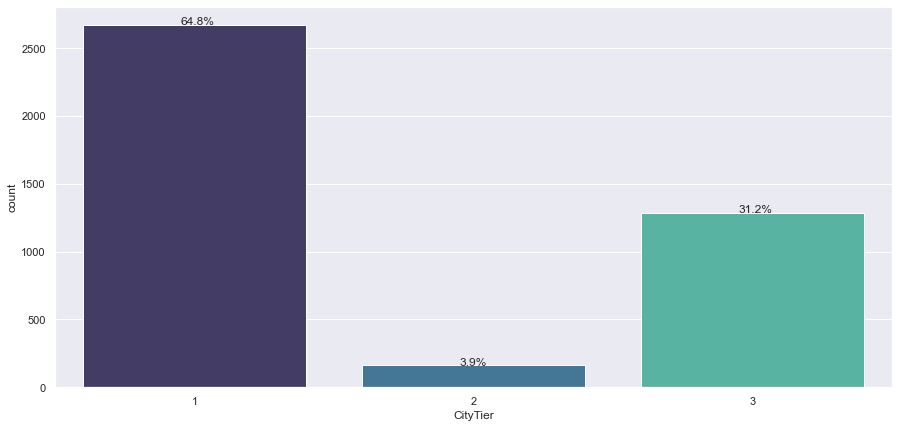

In [43]:
perc_on_bar(df.CityTier)

- About 65% are in Tier 1, 4.1% in Tier 2 and 30.7% in Tier 3

### Occupation

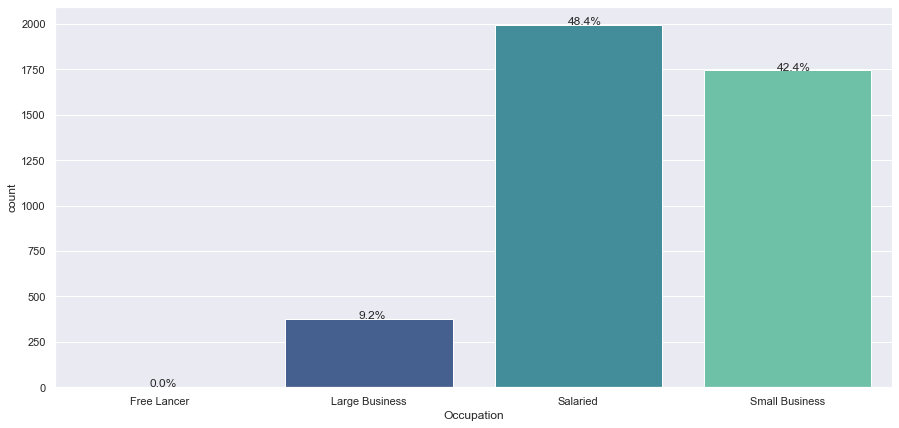

In [44]:
perc_on_bar(df.Occupation)

- About 9% Large business, 48% are Salaried and 42.4% are Small business. The majority of the customer occupation are salary or small business. Could be both. 

### Gender

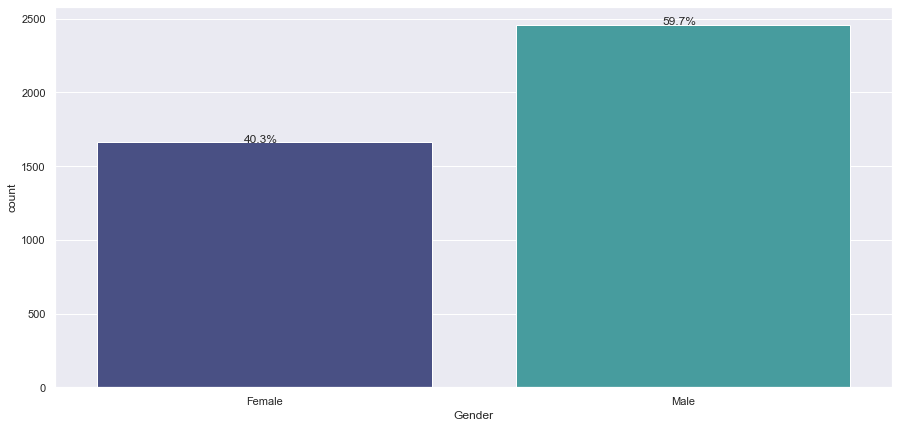

In [45]:
perc_on_bar(df.Gender)

- About 60% are Male and 40% are Female.

### NumberOfPersonVisiting

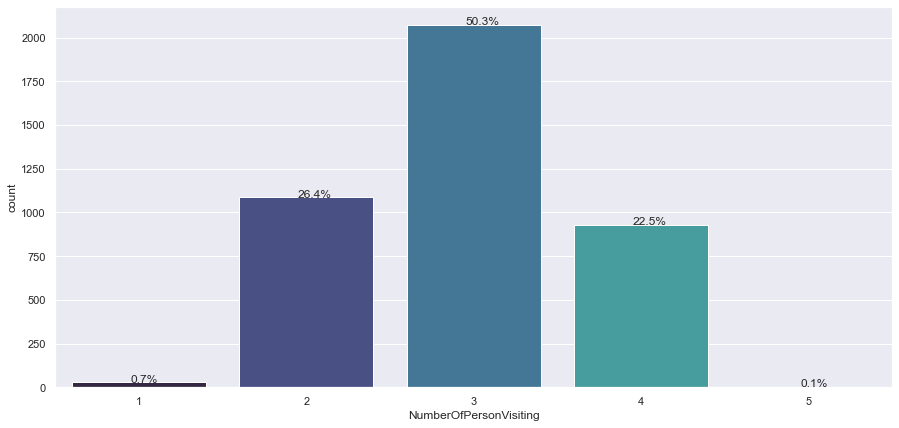

In [46]:
perc_on_bar(df.NumberOfPersonVisiting)

- Two people visiting is 26%, three people is 50% and 4 people visiting is 22.5%. 

### NumberOfFollowups

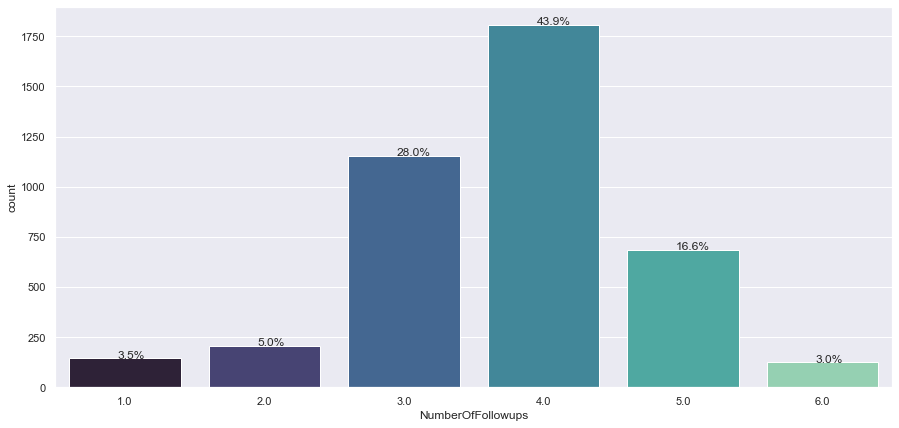

In [47]:
perc_on_bar(df.NumberOfFollowups)

- The majority of the number of followups is four with 43.9% of the share. Second is three with 28% of the population.

### ProductPitched

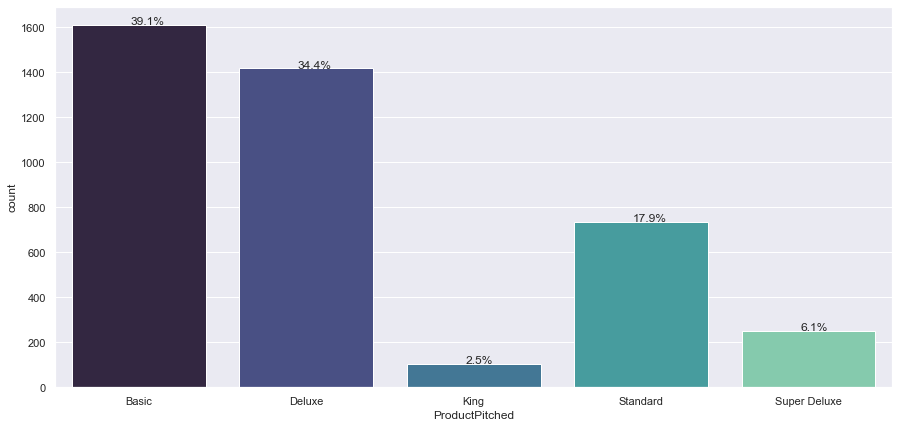

In [48]:
perc_on_bar(df.ProductPitched)

- The basic package was pitched 39% of the time. The deluxe package was pitched 34.4% of the time. The standard package come in third and was pitched 17.9% of the time.

### PreferredPropertyStar

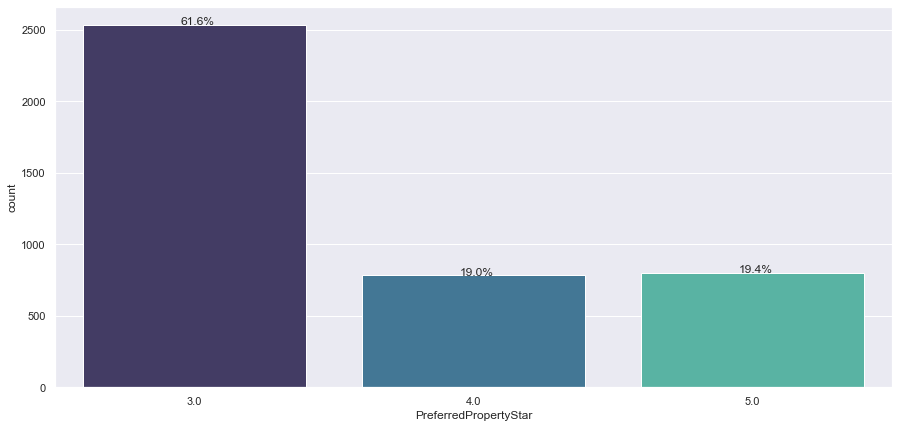

In [49]:
perc_on_bar(df.PreferredPropertyStar)

- Three is the majority amongst the preferred star rating at 61.1%. Five and Four come in second and third place respectively with 19.4% and 19% of the share.

### MaritalStatus

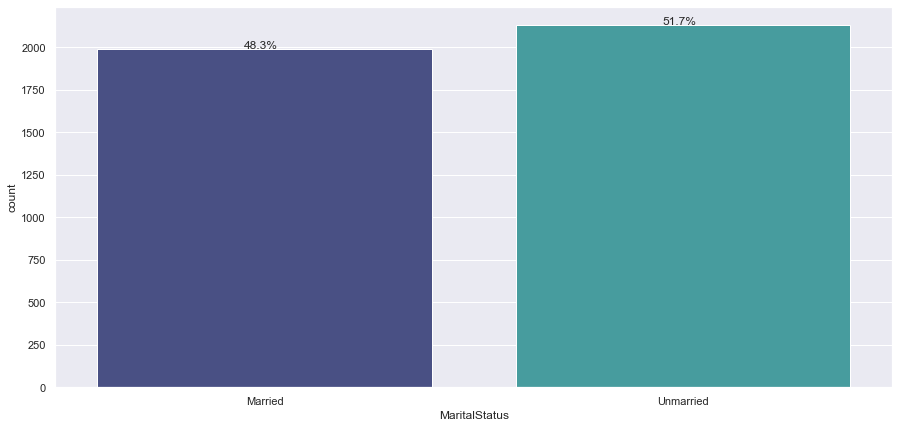

In [50]:
perc_on_bar(df.MaritalStatus)

- Unmarried hold the majority of the customer population with 51.7%. Married holds 48.3% of the customer population.

### Passport

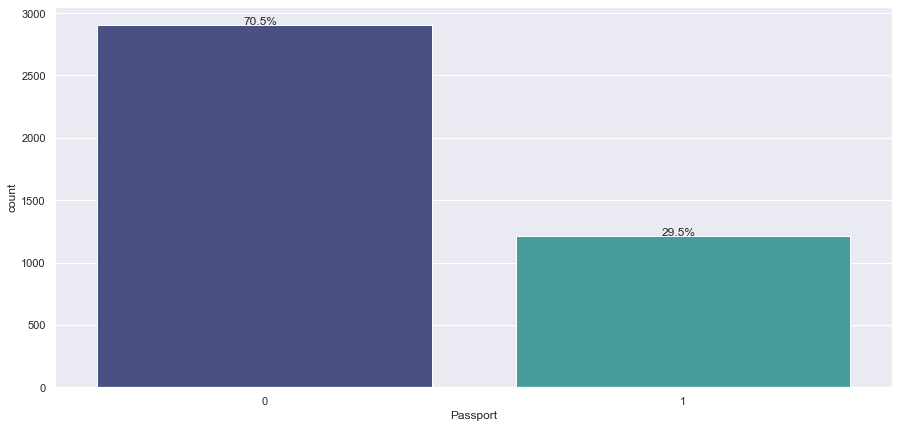

In [51]:
perc_on_bar(df.Passport)

- Those customers who dont hold a passport make up the majority at 70.5%. Those with a passport make up 29.5%.

### PitchSatisfactionScore

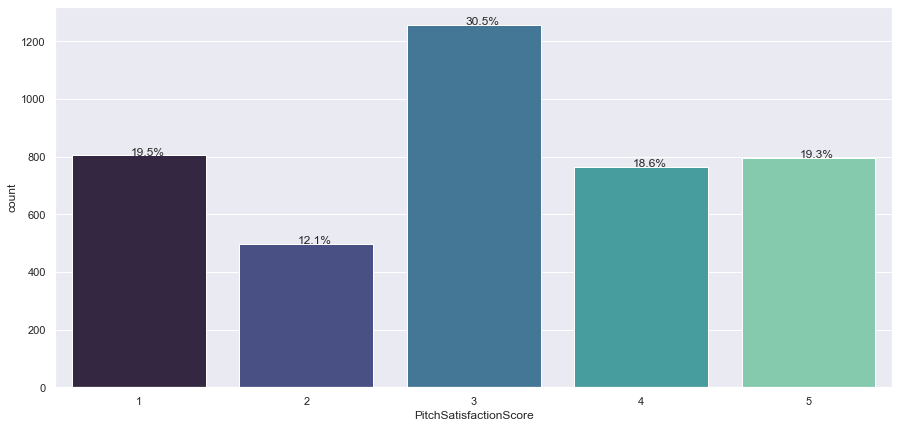

In [52]:
perc_on_bar(df.PitchSatisfactionScore)

- A pitch satisfaction score of three makes up the majority with 30.5%. A score of one is the second highest majority at 19.5%. A score of 5 makes up 19.3% and a score of 4 makes up 18.6% of the population.

### OwnCar

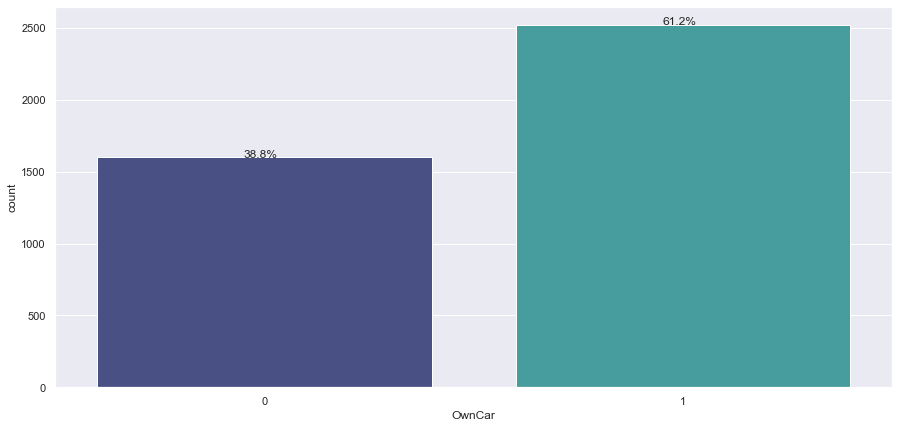

In [53]:
perc_on_bar(df.OwnCar)

- Those customers who don't own a car makes up 38.8% of the customer population. Those customer who own a car make up 61.2% of the population.

### NumberOfChildrenVisiting

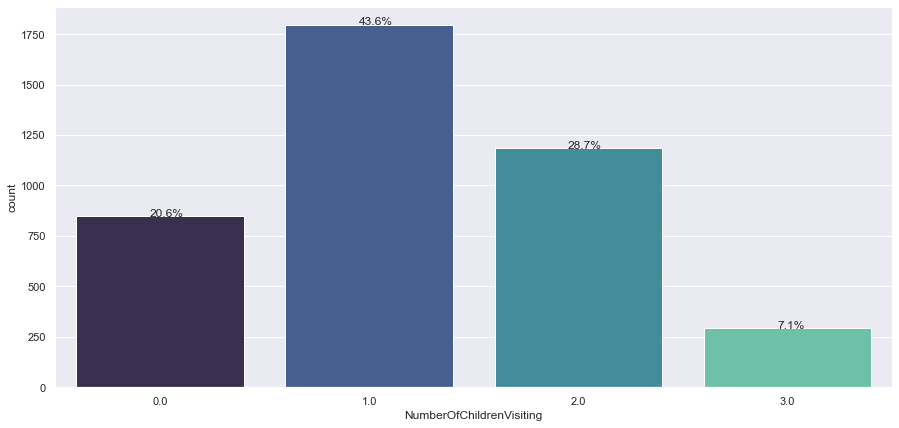

In [54]:
perc_on_bar(df.NumberOfChildrenVisiting)

- One child visiting is 43.6%. Two children is 28.7% and zero children is 20.6%. Three children visiting makes up 7.1%.

### Designation

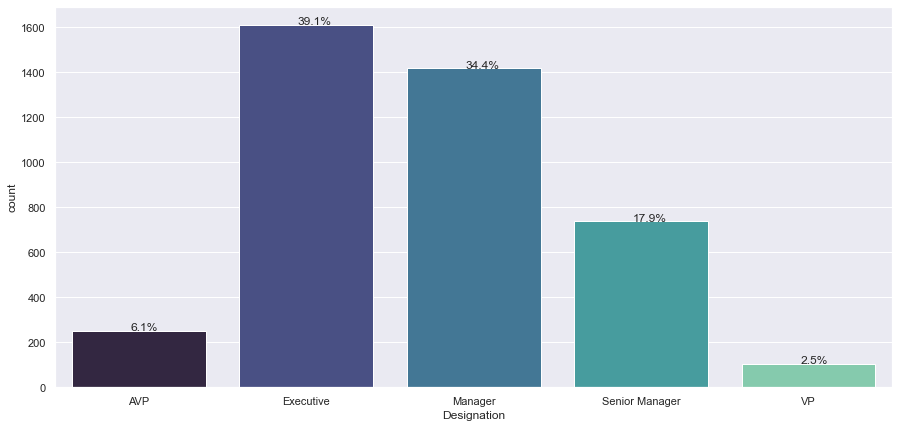

In [55]:
perc_on_bar(df.Designation)

- Executives make up the majority with 39.1% of the population. Manager is 34.4%. Senior Manager makes up 17.9%. AVP and VP is 6.1% and 2.5%.

### NumberOfTrips

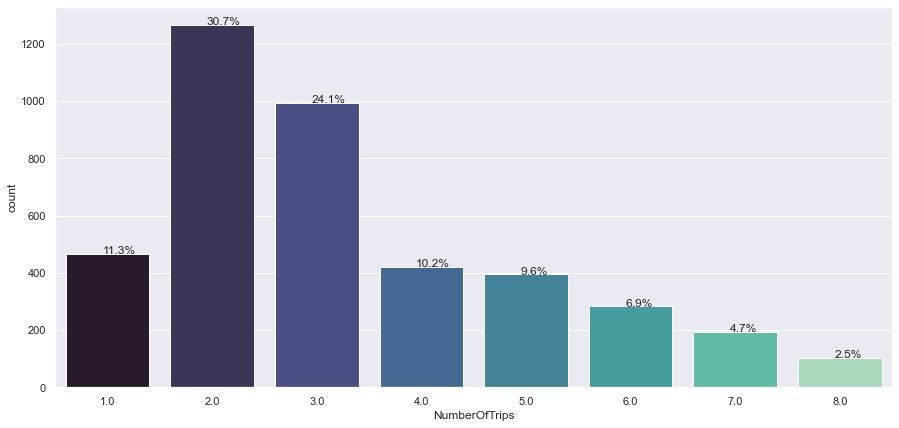

In [56]:
perc_on_bar(df.NumberOfTrips)

- The most trips is two, which makes up 30.7% of the population. Second place is three with 24.1%. At third place, is one with 11.3% of the share.

### Bivariate Analysis

In [57]:
## Function to plot stacked bar chart
def stacked_plot(x, y, show_df=True):
    """
    Shows stacked plot from x and y pandas data series
    x: pandas data series
    y: pandas data series
    show_df: flag to show dataframe above plot (default=True)
    """
    if show_df == True:
        info = pd.crosstab(x, y, margins=True)
        info['% - 0'] = round(info[0]/info['All']*100, 2)
        info['% - 1'] = round(info[1]/info['All']*100, 2)
        display(info.sort_values(by='% - 1', ascending=False))
        
    pd.crosstab(x, y, normalize='index'). plot(kind='bar', stacked=True, figsize=(10,5));

In [58]:
def show_boxplots(cols: list, feature: str, show_fliers=True, data=df): #method call to show bloxplots
    """
    Shows boxplots from pandas data series
    cols: list of column names
    feature: dataframe categorical feature
    """
    n_rows = math.ceil(len(cols)/3)
    plt.figure(figsize=(15, n_rows*5))
    for i, variable in enumerate(cols):
        plt.subplot(n_rows, 3, i+1)
        if show_fliers:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=True) 
        else:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=False)
        plt.tight_layout()
        plt.title(variable, fontsize=12)
    plt.show()

### Heat map

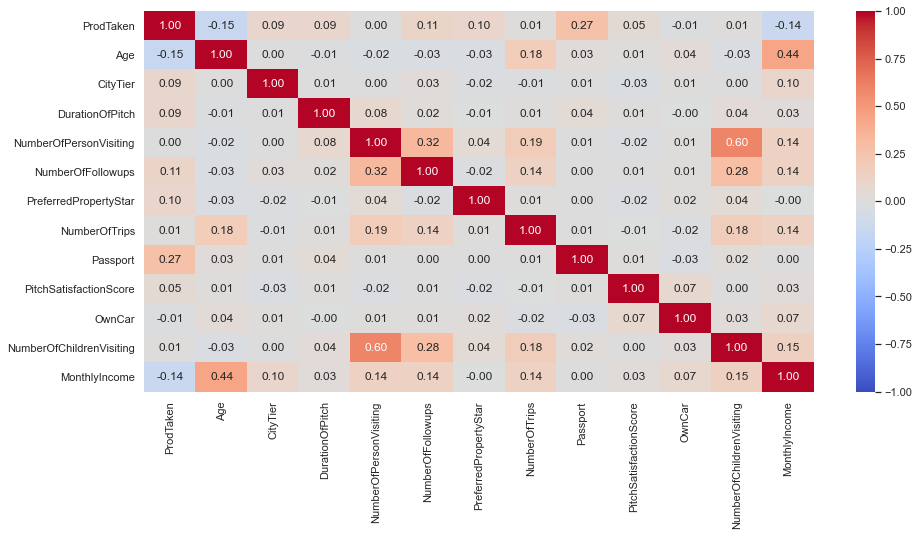

In [59]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='coolwarm');

- NumberofChildrenVisiting and NumberOfPersonVisiting are positively correlated.
- Age and MontlyIncome are positively correlated. 
- NumberofFollowups and NumberOfPersonVisiting are correlated. 

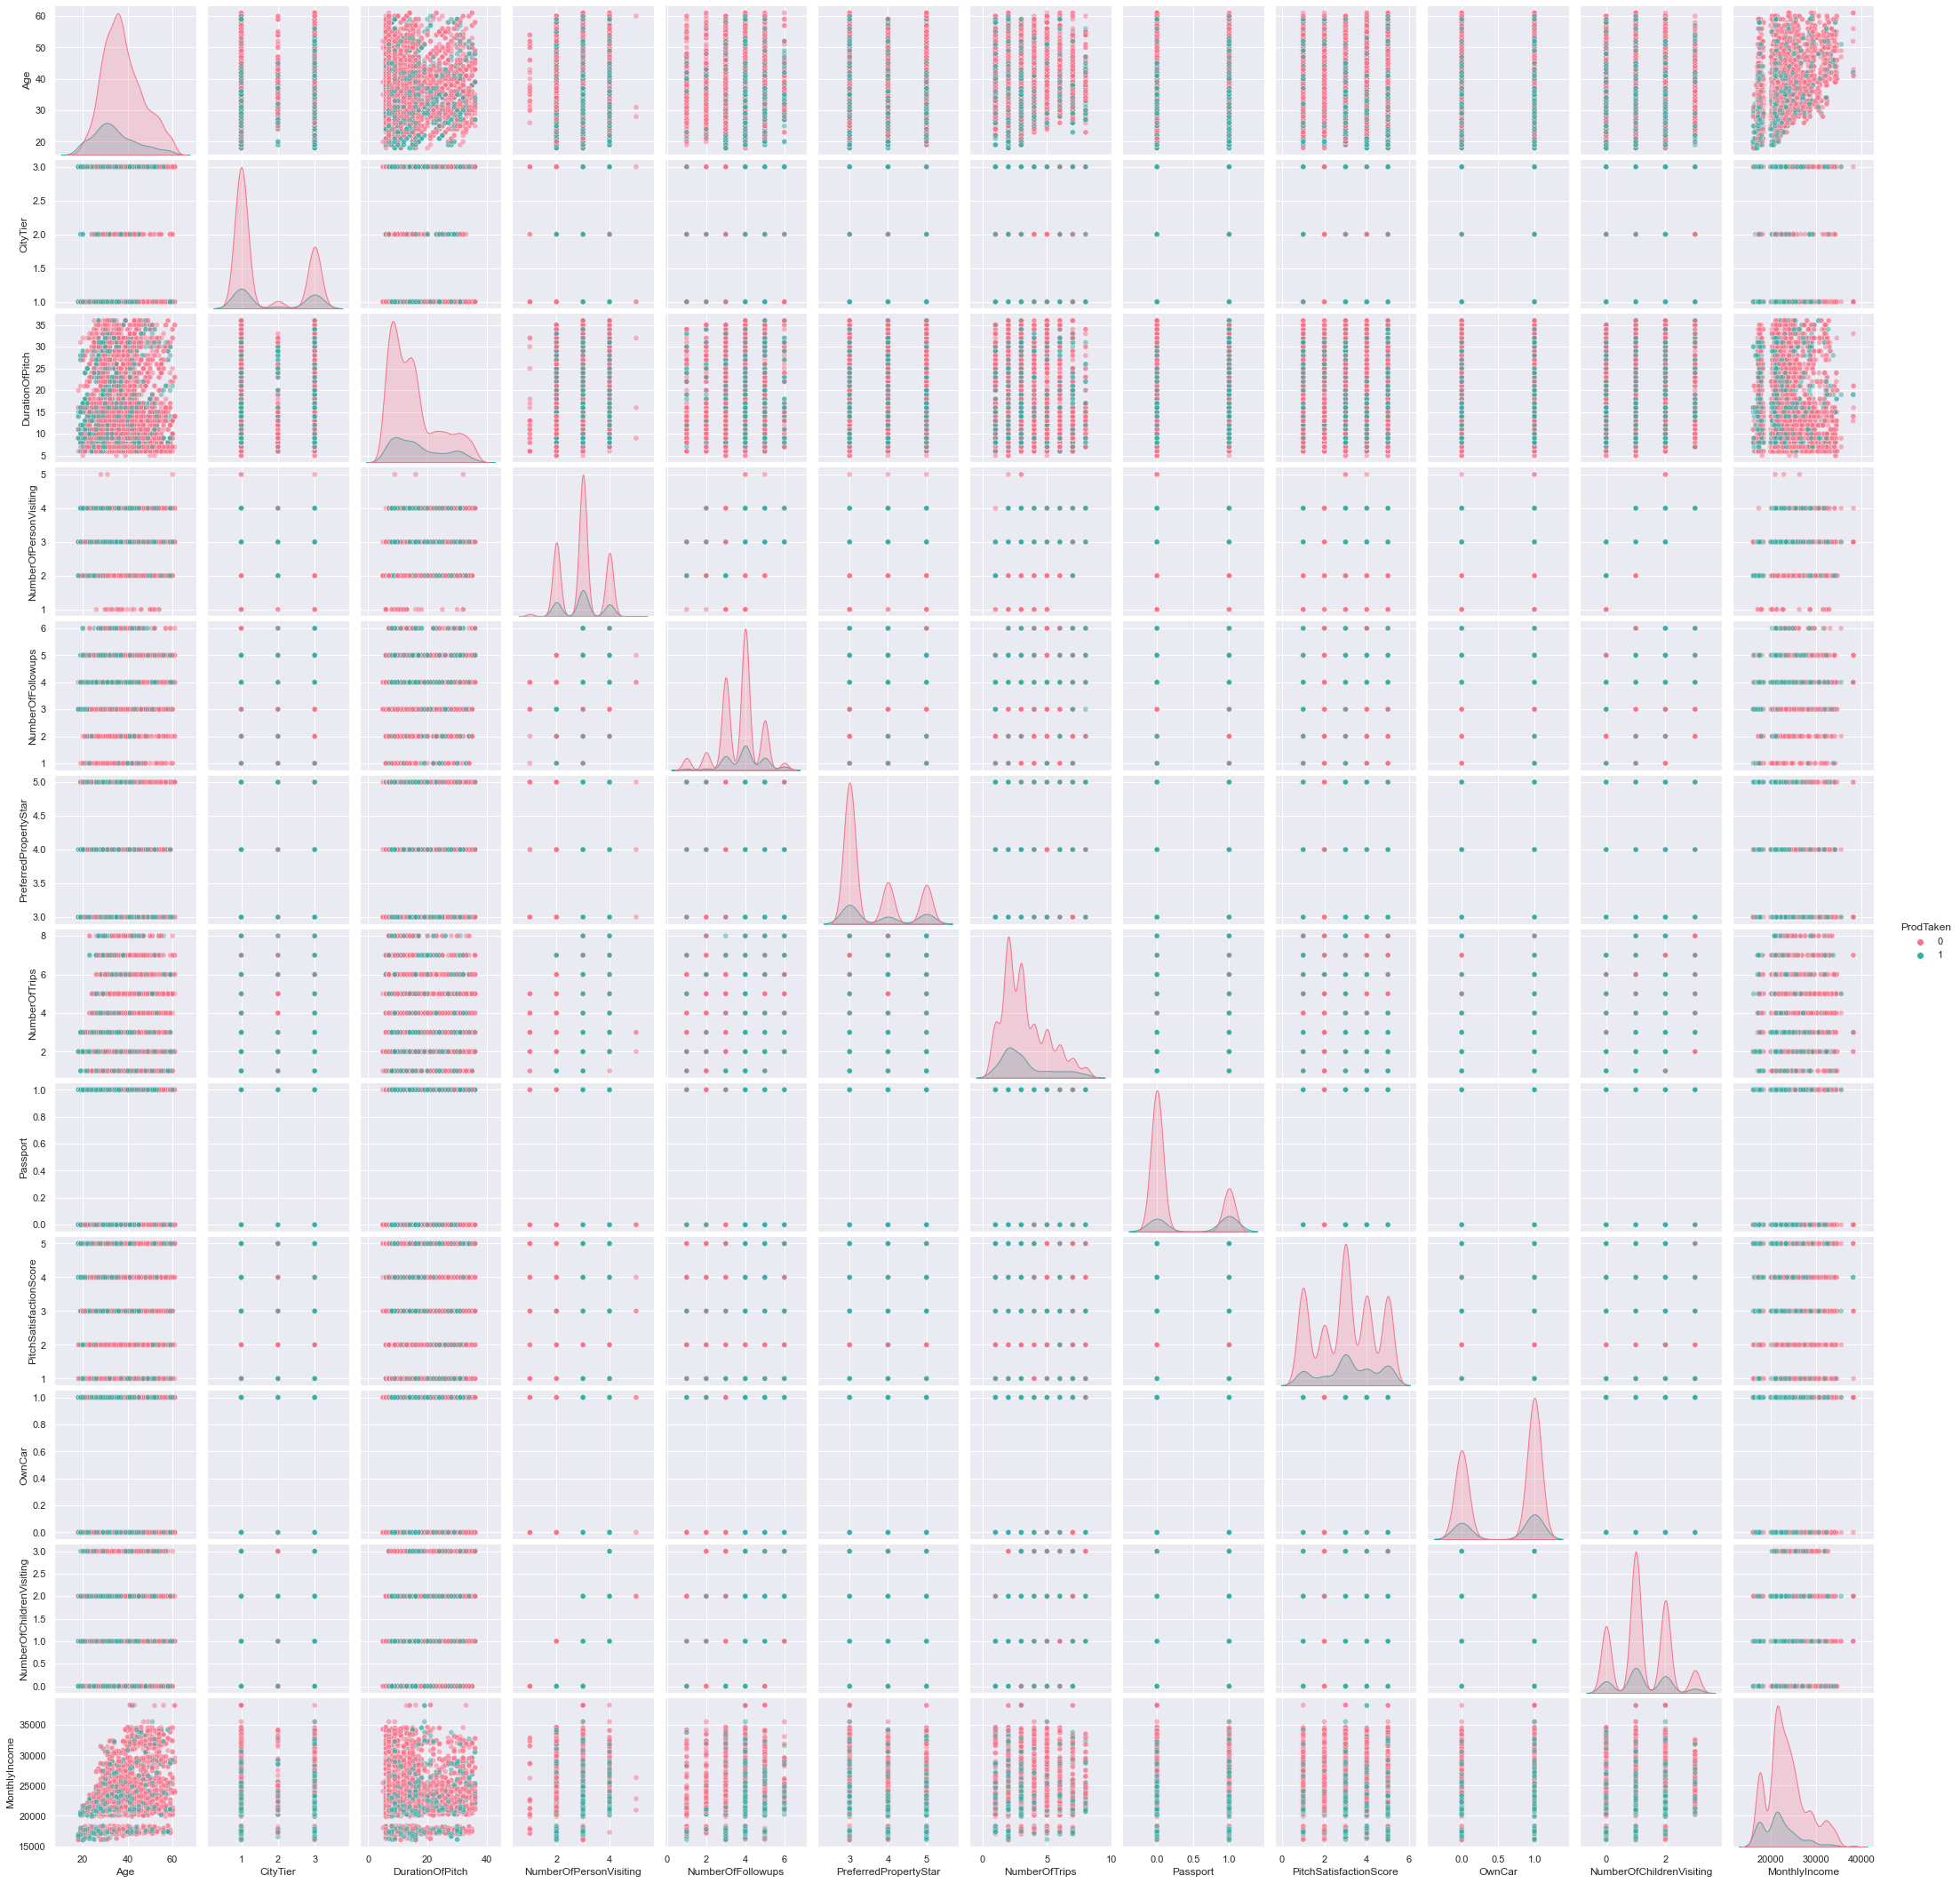

In [60]:
sns.pairplot(data=df, 
             vars=['Age', 'CityTier', 'DurationOfPitch',
                   'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
                   'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
                   'NumberOfChildrenVisiting', 'MonthlyIncome'],
             hue='ProdTaken',
             palette='husl',
             plot_kws={'alpha': 0.5});

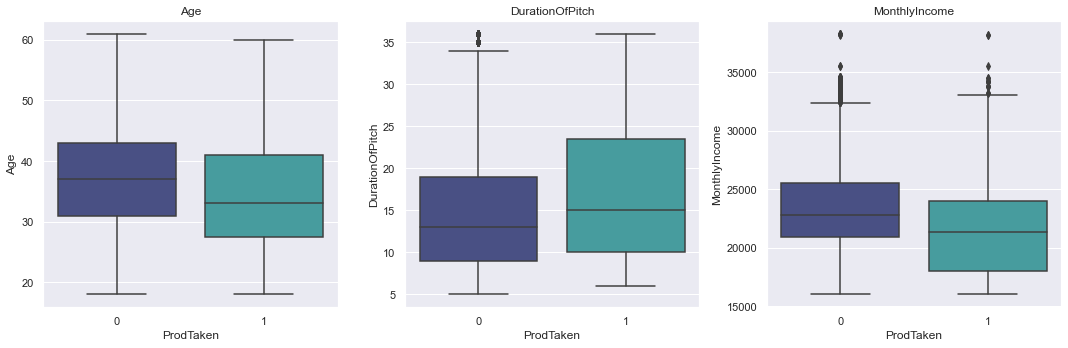

In [61]:
cols = ['Age','DurationOfPitch', 'MonthlyIncome']
show_boxplots(cols, 'ProdTaken')

- On average those who have taken the product are younger.
- The duration of pitch from the rep is longer on average amongst customers who have taken the product.
- Monthly income is lower amongst those customer who have taken the product. 

ProdTaken,0,1,All,% - 0,% - 1
TypeofContact,,,,,
Company Invited,932,273,1205,77.34,22.66
All,3325,795,4120,80.70,19.30
Self Enquiry,2393,522,2915,82.09,17.91


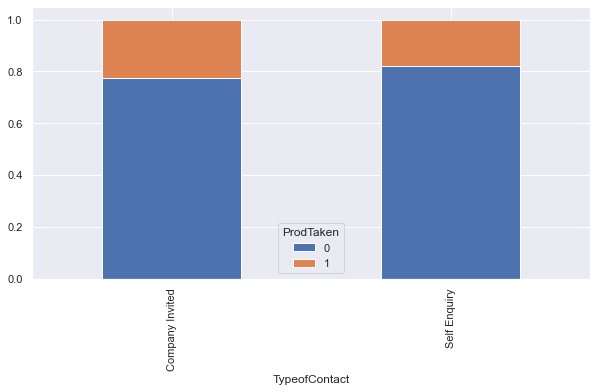

In [62]:
stacked_plot(df.TypeofContact, df.ProdTaken)

- Percentage is similar amongst different types of contracts.

ProdTaken,0,1,All,% - 0,% - 1
CityTier,,,,,
2,119,43,162,73.46,26.54
3,976,311,1287,75.84,24.16
All,3325,795,4120,80.70,19.30
1,2230,441,2671,83.49,16.51


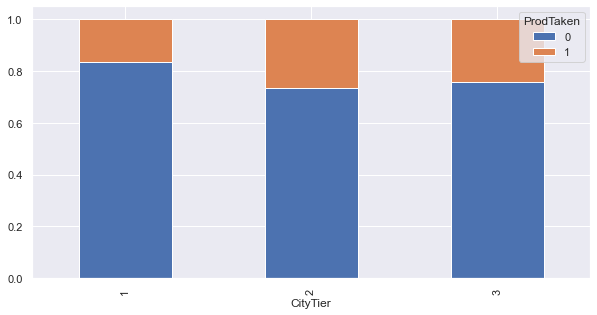

In [63]:
stacked_plot(df.CityTier, df.ProdTaken)

- City tier two has a greater percentage of those customers that have taken the product.
- City tier three has the second highest percentage of those customers who have taken the product.

ProdTaken,0,1,All,% - 0,% - 1
DurationOfPitch,,,,,
31.0,50,31,81,61.73,38.27
19.0,33,19,52,63.46,36.54
30.0,58,28,86,67.44,32.56
28.0,38,17,55,69.09,30.91
29.0,43,19,62,69.35,30.65
18.0,49,19,68,72.06,27.94
23.0,56,20,76,73.68,26.32
20.0,41,14,55,74.55,25.45
24.0,50,16,66,75.76,24.24


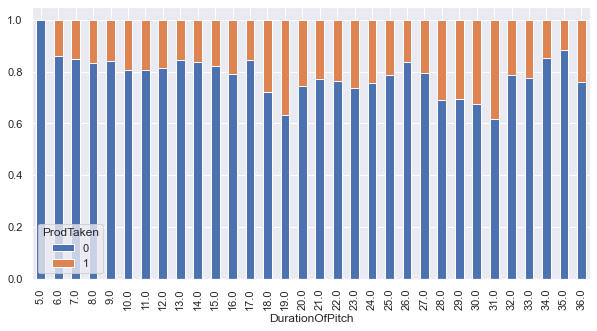

In [64]:
stacked_plot(df.DurationOfPitch, df.ProdTaken)

- Duration of pitch versus those who have taken the product is looks to be greatest between the range of 19 to 31.

ProdTaken,0,1,All,% - 0,% - 1
Occupation,,,,,
Free Lancer,0,2,2,0.00,100.00
Large Business,268,109,377,71.09,28.91
All,3325,795,4120,80.70,19.30
Small Business,1421,325,1746,81.39,18.61
Salaried,1636,359,1995,82.01,17.99


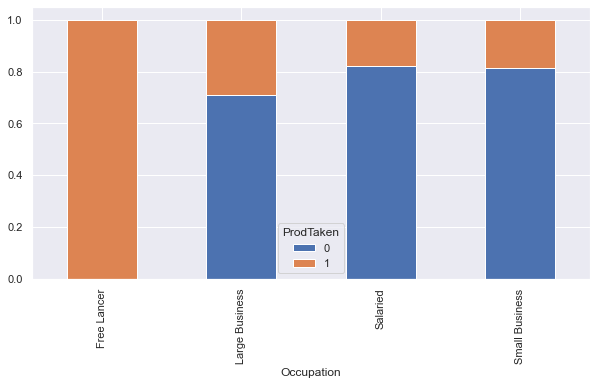

In [65]:
stacked_plot(df.Occupation, df.ProdTaken)

- All free lancers have taken the product but that there is a small percentage of free lancers in the dataset.
- Large business holds the greatest percentage of those customers that have taken the product.

ProdTaken,0,1,All,% - 0,% - 1
Gender,,,,,
Male,1962,496,2458,79.82,20.18
All,3325,795,4120,80.70,19.30
Female,1363,299,1662,82.01,17.99


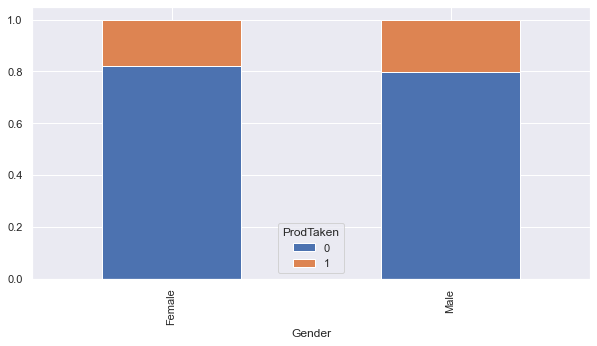

In [66]:
stacked_plot(df.Gender, df.ProdTaken)

- The distribution is similar amongst genders.

ProdTaken,0,1,All,% - 0,% - 1
NumberOfPersonVisiting,,,,,
2,872,215,1087,80.22,19.78
4,749,180,929,80.62,19.38
3,1673,400,2073,80.70,19.30
All,3325,795,4120,80.70,19.30
1,28,0,28,100.00,0.00
5,3,0,3,100.00,0.00


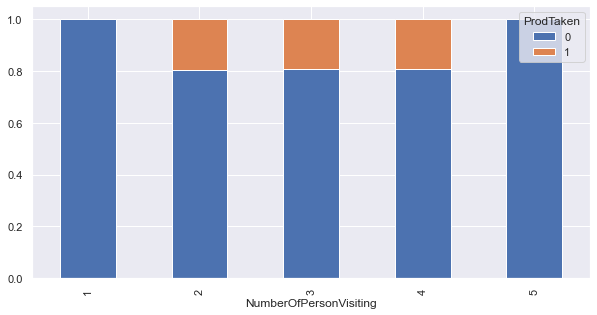

In [67]:
stacked_plot(df.NumberOfPersonVisiting, df.ProdTaken)

- The greatest percentage of those customers who have taken the product is greatest between the ranges of 2 to 4 people visiting.

ProdTaken,0,1,All,% - 0,% - 1
NumberOfFollowups,,,,,
6.0,75,49,124,60.48,39.52
5.0,514,171,685,75.04,24.96
All,3325,795,4120,80.70,19.30
4.0,1465,342,1807,81.07,18.93
3.0,961,193,1154,83.28,16.72
1.0,125,19,144,86.81,13.19
2.0,185,21,206,89.81,10.19


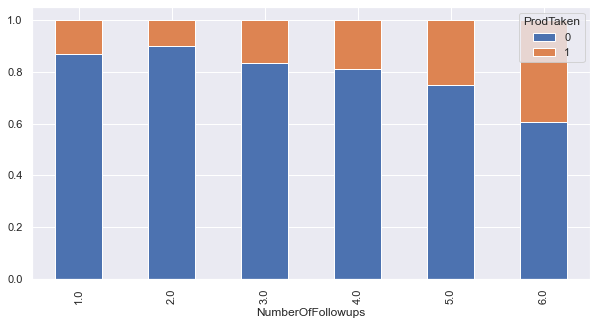

In [68]:
stacked_plot(df.NumberOfFollowups, df.ProdTaken)

- Greatest percentage of customers who have taken the product is greatest with 6 followups.
- The seconds highest percentage  is 5 followups. Four followups is in third place.

ProdTaken,0,1,All,% - 0,% - 1
ProductPitched,,,,,
Basic,1128,483,1611,70.02,29.98
All,3325,795,4120,80.70,19.30
Standard,618,119,737,83.85,16.15
Deluxe,1253,165,1418,88.36,11.64
King,95,9,104,91.35,8.65
Super Deluxe,231,19,250,92.40,7.60


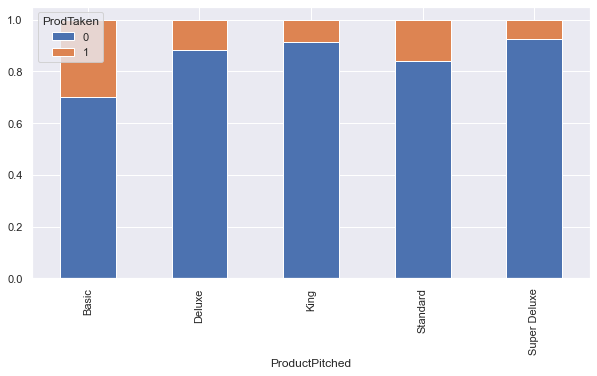

In [69]:
stacked_plot(df.ProductPitched, df.ProdTaken)

- Basic holds the greatest percentage amongst those customers who have taken the product.
- Standard hold the second highest percentage amongst those customers who have taken the product.

ProdTaken,0,1,All,% - 0,% - 1
PreferredPropertyStar,,,,,
5.0,584,216,800,73.00,27.00
4.0,625,159,784,79.72,20.28
All,3325,795,4120,80.70,19.30
3.0,2116,420,2536,83.44,16.56


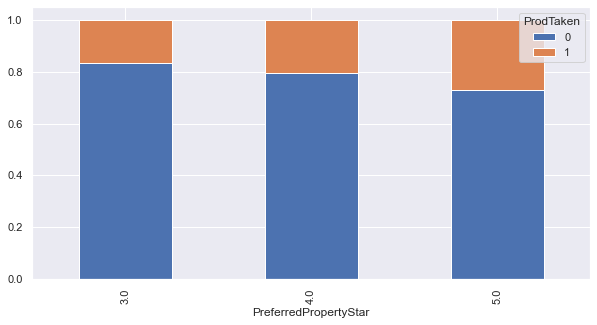

In [70]:
stacked_plot(df.PreferredPropertyStar, df.ProdTaken)

- Five property stars holds the highest percentage of those customers who have taken the product.

ProdTaken,0,1,All,% - 0,% - 1
MaritalStatus,,,,,
Unmarried,1619,512,2131,75.97,24.03
All,3325,795,4120,80.70,19.30
Married,1706,283,1989,85.77,14.23


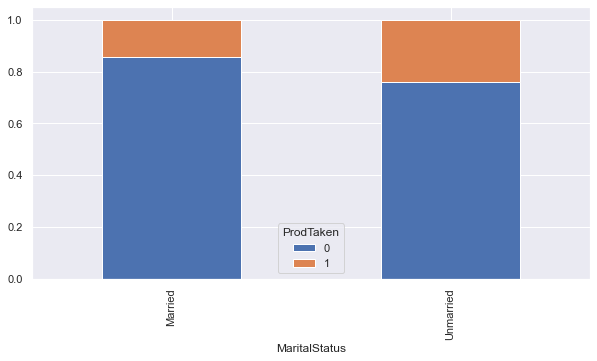

In [71]:
stacked_plot(df.MaritalStatus, df.ProdTaken)

- Unmarried customers hold the greatest percentage of those who have taken the product.

ProdTaken,0,1,All,% - 0,% - 1
NumberOfTrips,,,,,
7.0,137,56,193,70.98,29.02
8.0,74,29,103,71.84,28.16
2.0,992,274,1266,78.36,21.64
3.0,800,193,993,80.56,19.44
All,3325,795,4120,80.70,19.30
6.0,231,52,283,81.63,18.37
1.0,384,83,467,82.23,17.77
5.0,339,56,395,85.82,14.18
4.0,368,52,420,87.62,12.38


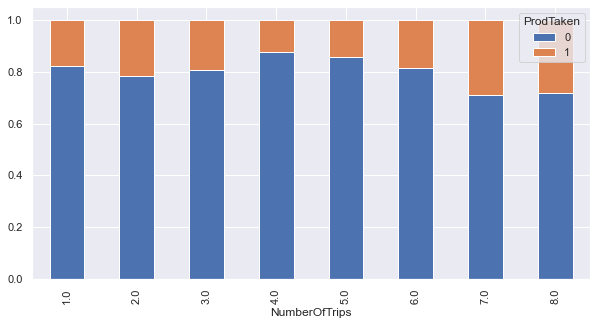

In [72]:
stacked_plot(df.NumberOfTrips, df.ProdTaken)

- Seven trips is holds the greatest percentage of the product taken.

ProdTaken,0,1,All,% - 0,% - 1
Passport,,,,,
1,779,435,1214,64.17,35.83
All,3325,795,4120,80.70,19.30
0,2546,360,2906,87.61,12.39


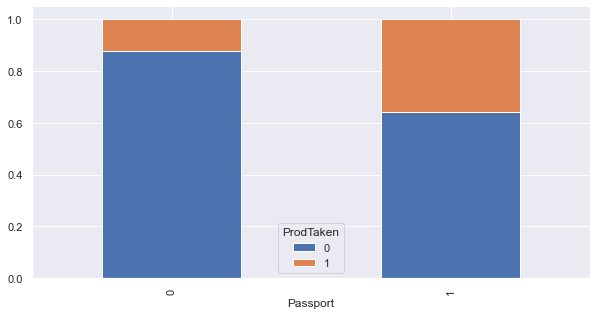

In [73]:
stacked_plot(df.Passport, df.ProdTaken)

- Those customers with a passport hold the greatest percentage of products taken.

ProdTaken,0,1,All,% - 0,% - 1
PitchSatisfactionScore,,,,,
5,621,175,796,78.02,21.98
3,983,274,1257,78.20,21.80
All,3325,795,4120,80.70,19.30
4,623,142,765,81.44,18.56
2,419,78,497,84.31,15.69
1,679,126,805,84.35,15.65


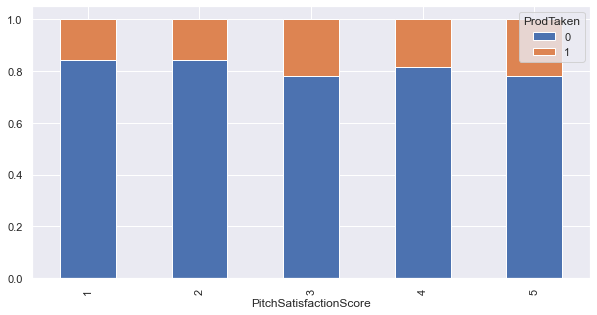

In [74]:
stacked_plot(df.PitchSatisfactionScore, df.ProdTaken)

- Product taken is greatest amongst those customers that noted a pitch satisfaction score of 3. Second highest is a pitch satisfaction score of 5. 

ProdTaken,0,1,All,% - 0,% - 1
OwnCar,,,,,
0,1283,316,1599,80.24,19.76
All,3325,795,4120,80.70,19.30
1,2042,479,2521,81.00,19.00


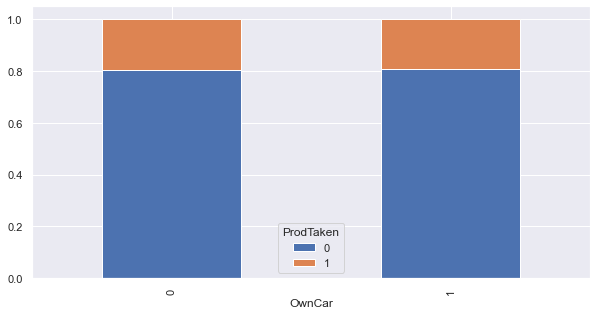

In [75]:
stacked_plot(df.OwnCar, df.ProdTaken)

- The distribution of products taken amongst those customers who own cars is similar.

ProdTaken,0,1,All,% - 0,% - 1
NumberOfChildrenVisiting,,,,,
3.0,234,59,293,79.86,20.14
2.0,953,231,1184,80.49,19.51
All,3325,795,4120,80.70,19.30
1.0,1451,345,1796,80.79,19.21
0.0,687,160,847,81.11,18.89


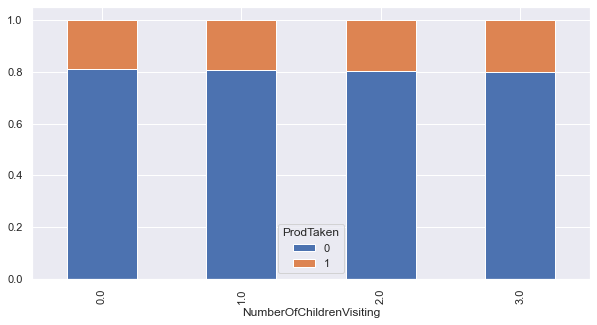

In [76]:
stacked_plot(df.NumberOfChildrenVisiting, df.ProdTaken)

- Distribution is similar amongst the number of children visiting.

ProdTaken,0,1,All,% - 0,% - 1
Designation,,,,,
Executive,1128,483,1611,70.02,29.98
All,3325,795,4120,80.70,19.30
Senior Manager,618,119,737,83.85,16.15
Manager,1253,165,1418,88.36,11.64
VP,95,9,104,91.35,8.65
AVP,231,19,250,92.40,7.60


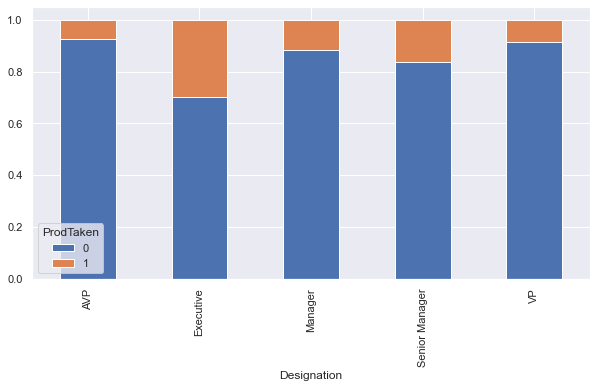

In [77]:
stacked_plot(df.Designation, df.ProdTaken)

- Executive holds the greatest designation amongst customers who took the product.
- Senior Manager hold the seconds highest designation amongst customers who have taken the product.

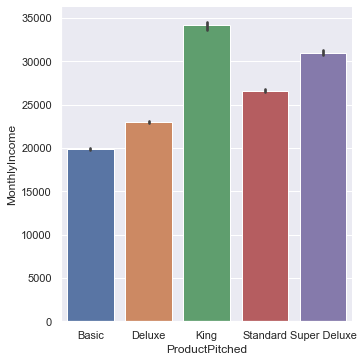

In [111]:
sns.catplot(x="ProductPitched",y="MonthlyIncome", data=df, kind="bar");

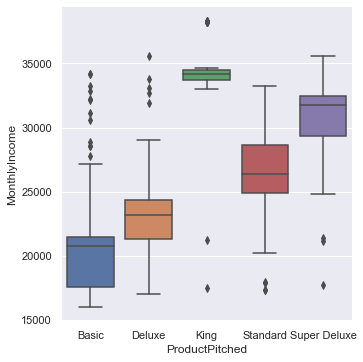

In [119]:
sns.catplot(x="ProductPitched",y="MonthlyIncome", data=df, kind="box");

- Products pitched to customers based on monthly income show the king package to be pitched to those customers with higher monthly incomes.
- Salepeople pitch the basic package to those customers with lower monthly incomes.
- The basic package has more outliers in it's distribution.

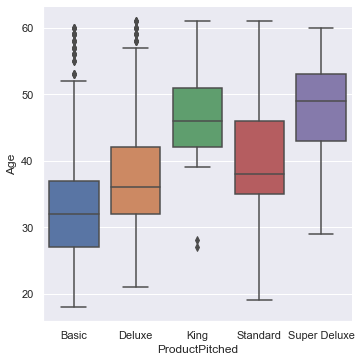

In [121]:
sns.catplot(x="ProductPitched",y="Age", data=df, kind="box");

- Salepeople pitch the basic package to a younger population. There are more outliers in this distribution.
- Sales people pitch the King package to an older crowd. The highest age, on average, is the Deluxe package. The deluxe package was pitched to the oldest group of customers on average.

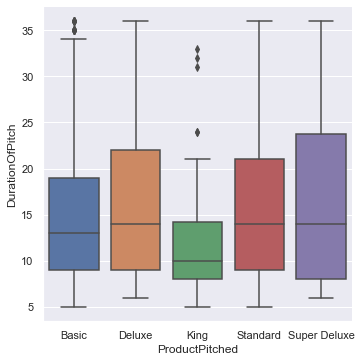

In [120]:
sns.catplot(x="ProductPitched",y="DurationOfPitch", data=df, kind="box");

<a id=preprocessing></a>
## <span style="color:blue">Data Preprocessing</span>
<div style="text-align:right"><a href=#top>top</a></div>

In [78]:
cols = df.select_dtypes(include='category').columns
dummies = pd.get_dummies(df, columns=cols, drop_first=True)
dummies.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,0,1,0,0,0,1,0,1,0,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,1,1,0,0,0,1,0,1,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,1,0,0,0,0,1,1,0,0,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,0,0,0,0,1,1,0,0,0
5,0,32.0,1,8.0,3,3.0,3.0,1.0,0,5,...,1,0,0,0,0,1,1,0,0,0


<a id=splitting></a>
## <span style="color:blue">Splitting Dataset</span>
<div style="text-align:right"><a href=#top>top</a></div>

In [79]:
X = dummies.drop('ProdTaken', axis=1)
X.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,...,0,1,0,0,0,1,0,1,0,0
1,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,...,1,1,0,0,0,1,0,1,0,0
2,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,...,1,0,0,0,0,1,1,0,0,0
3,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,...,0,0,0,0,0,1,1,0,0,0
5,32.0,1,8.0,3,3.0,3.0,1.0,0,5,1,...,1,0,0,0,0,1,1,0,0,0


In [80]:
y = dummies.pop('ProdTaken')
y.head()

0    1
1    0
2    1
3    0
5    0
Name: ProdTaken, dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(2884, 26) (1236, 26)


In [82]:
y.value_counts(normalize=True)

0    0.807039
1    0.192961
Name: ProdTaken, dtype: float64

----

<a id=modelbuilding></a>
## <span style="color:blue">Model Building</span>
<div style="text-align:right"><a href=#top>top</a></div>

### Model evaluation criterion

#### Model can make wrong predictions as:

- Predicting a customer will purchase the package when in fact the customer won't purchase the wellness package.
- Predicting the customer will not purchase the package when in fact the customer will purchase the package.

#### Which case is more important?

1. If the model predicts a customer will not purchase the package, but the customer in fact will purchase the package.

2. If the model predicts a customer will purchase a package but doesn't actually purchase the package then this is loss of resources used.

#### Which metric to optimize?

- We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

**Let's define function to provide metric scores on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [83]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    '''
    model : classifier to predict values of X
    flag: Flag to print metric score dataframe. (default=True)
    '''
    # defining an empty list to store train and test results
    scores = []   
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    scores.extend(
        (
            train_acc, test_acc, 
            train_recall, test_recall, 
            train_precision, test_precision,
            train_f1, test_f1
        )
    )  
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        metric_names = [
            'Train Accuracy', 'Test Accuracy', 'Train Recall', 'Test Recall',
            'Train Precision', 'Test Precision', 'Train F1-Score', 'Test F1-Score'
        ]
        cols = ['Metric', 'Score']
        records = [(name, score) for name, score in zip(metric_names, scores)]
        display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)

    return scores # returning the list with train and test scores

In [84]:
## Function to create confusion matrix
def make_confusion_matrix(model,  y_actual, labels=[1, 0], xtest=X_test):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    """
    y_predict = model.predict(xtest)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["Yes", "No"], columns=["Yes", "No"])
    
    group_counts = [f"{value:0.0f}" for value in cm.flatten()]   
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]  
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize = (10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel("Actual", fontsize=14)
    plt.xlabel("Predicted", fontsize=14);

<a id=decisiontree></a>
## <span style="color:blue">Decision Tree Classifier</span>
<div style="text-align:right"><a href=#top>top</a></div>

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,1.0,0.892395,1.0,0.719665,1.0,0.722689,1.0,0.721174


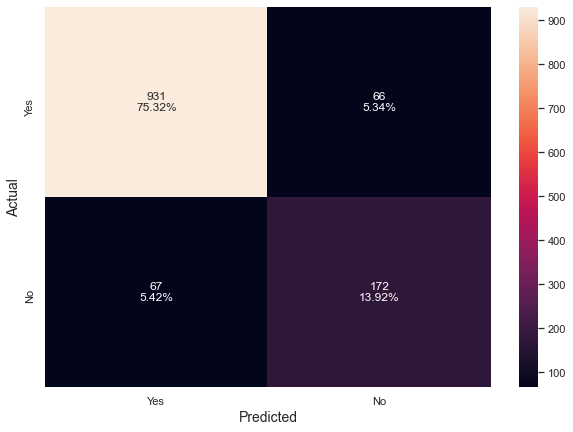

In [85]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

### Hyperparameter tuning

In [86]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight={0: 0.80, 1: 0.20}, random_state=1)

# Grid of pararmeters to choose from 
parameters = {
    'max_depth': np.arange(2, 30), 
    'min_samples_leaf': [1, 2, 5, 7, 10],
    'max_leaf_nodes': [2, 3, 5, 10, 15],
    'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combinations of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.8, 1: 0.2}, max_depth=7,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.84466,0.830906,0.196043,0.146444,0.990909,0.875,0.327327,0.250896


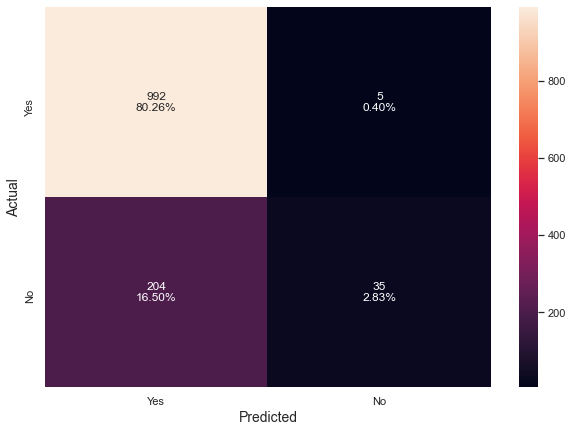

In [87]:
get_metrics_score(dtree_estimator)
make_confusion_matrix(dtree_estimator, y_test)

<a id=randomforest></a>
## <span style="color:blue">Random Forest Classifier</span>
<div style="text-align:right"><a href=#top>top</a></div>

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,1.0,0.908576,1.0,0.556485,1.0,0.95,1.0,0.701847


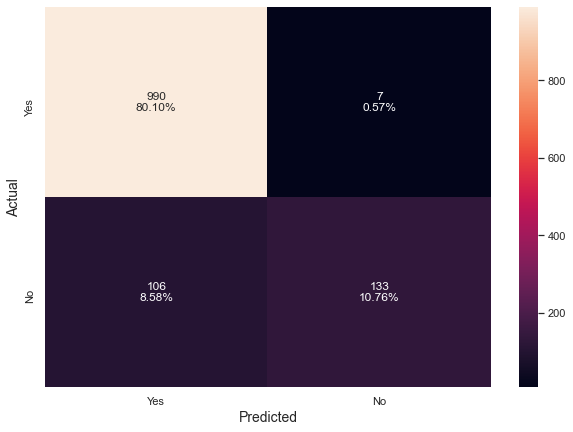

In [88]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

### Hyperparamter tuning

In [89]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0: 0.80, 1: 0.20},
                                  random_state=1,
                                  oob_score=True,
                                  bootstrap=True)

parameters = {
    'max_depth': np.arange(5, 30, 5),
    'max_features': ['sqrt','log2', None],
    'min_samples_leaf': np.arange(1, 15, 5),
    'min_samples_split': np.arange(2, 20, 5),
    'n_estimators': np.arange(10, 110, 10)
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, max_depth=25,
                       max_features=None, n_estimators=50, oob_score=True,
                       random_state=1)

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,1.0,0.917476,1.0,0.656904,1.0,0.887006,1.0,0.754808


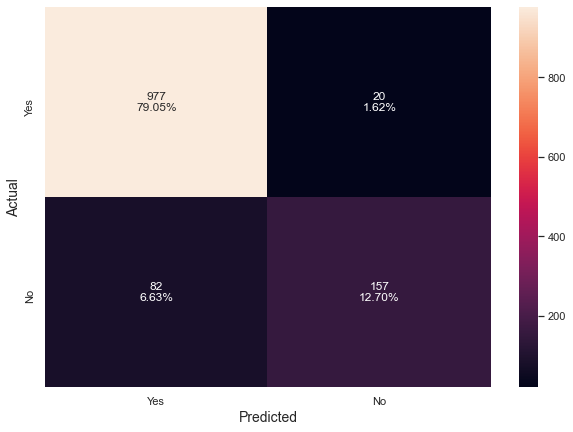

In [90]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned, y_test)

<a id=bagging></a>
## <span style="color:blue">Bagging Classifier</span>
<div style="text-align:right"><a href=#top>top</a></div>

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.995839,0.907767,0.978417,0.598326,1.0,0.888199,0.989091,0.715


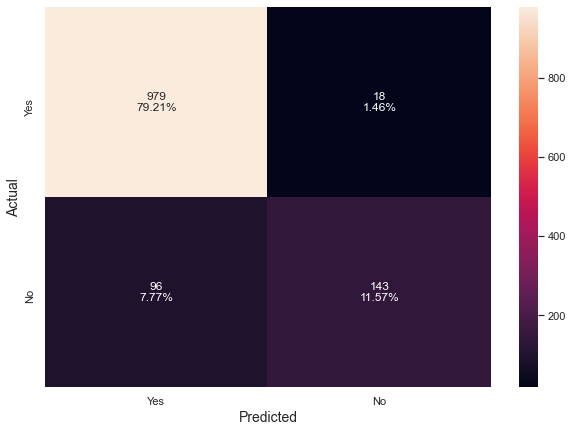

In [91]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

### Hyperparameter tuning

In [92]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_samples': [0.7, 0.8, 0.9, 1], 
    'max_features': [0.7, 0.8, 0.9, 1],
    'n_estimators' : [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.999307,0.911812,0.996403,0.577406,1.0,0.945205,0.998198,0.716883


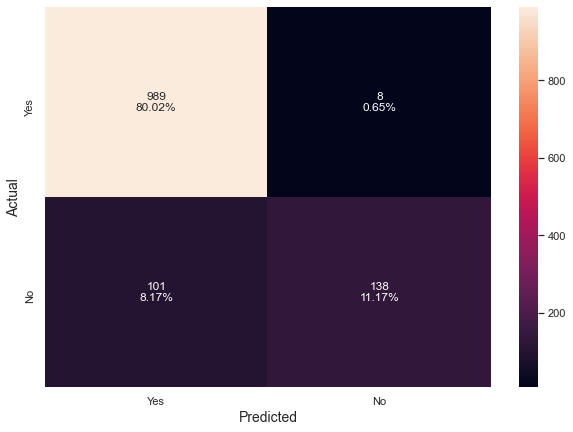

In [93]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

<a id=boosting></a>
## <span style="color:blue">AdaBoost Classifier</span>
<div style="text-align:right"><a href=#top>top</a></div>

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.847434,0.839806,0.348921,0.32636,0.713235,0.678261,0.468599,0.440678


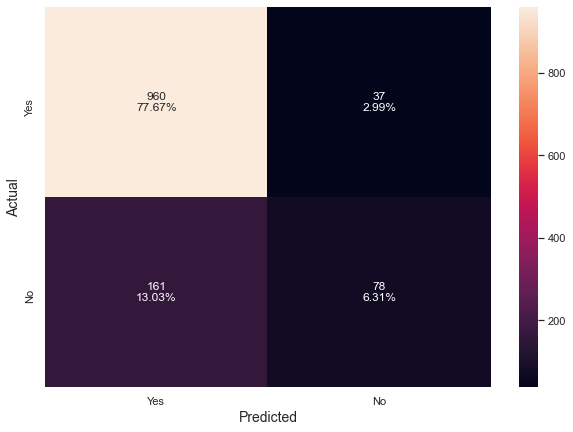

In [94]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)
get_metrics_score(abc)
make_confusion_matrix(abc, y_test)

### Hyperparameter Tuning

In [95]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[
        DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=4),
        DecisionTreeClassifier(max_depth=5),DecisionTreeClassifier(max_depth=6),
        DecisionTreeClassifier(max_depth=7), DecisionTreeClassifier(max_depth=8)
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate":np.arange(0.1, 2, 0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                   learning_rate=0.2, n_estimators=90, random_state=1)

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,1.0,0.91343,1.0,0.598326,1.0,0.928571,1.0,0.727735


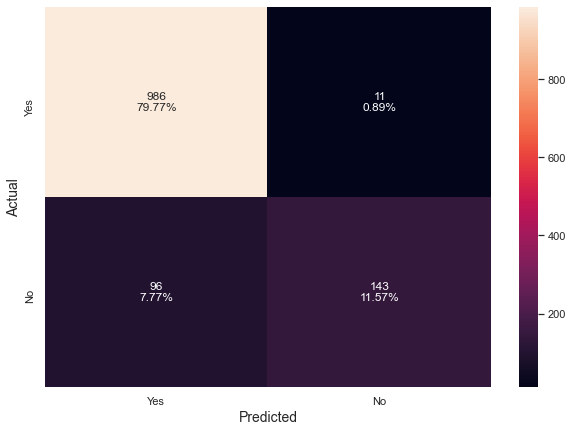

In [96]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

<a id=gradientboosting></a>
## <span style="color:blue">Gradient Boosting Classifier</span>
<div style="text-align:right"><a href=#top>top</a></div>

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.893551,0.869741,0.494604,0.430962,0.913621,0.804688,0.641774,0.561308


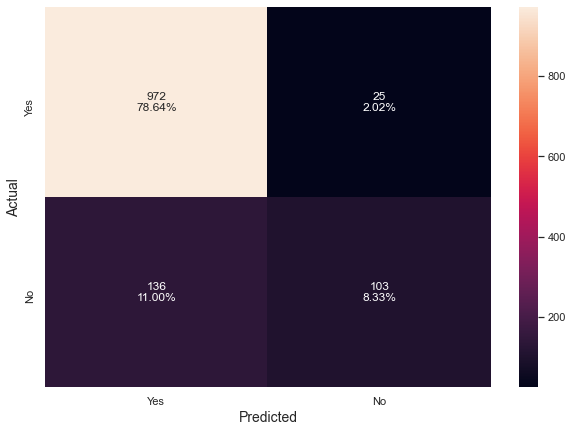

In [97]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

### Hyperparameter Tuning

In [98]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(100, 300, 50),
    "subsample":[0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "max_features":[0.7, 0.8, 0.9, 1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.929265,0.893204,0.663669,0.539749,0.955959,0.854305,0.783439,0.661538


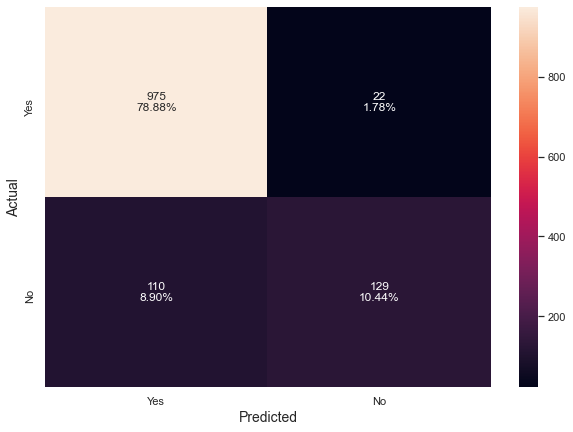

In [99]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned, y_test)

<a id=xgboost></a>
## <span style="color:blue">XGBoost Classifier</span>
<div style="text-align:right"><a href=#top>top</a></div>

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,1.0,0.915049,1.0,0.656904,1.0,0.872222,1.0,0.749403


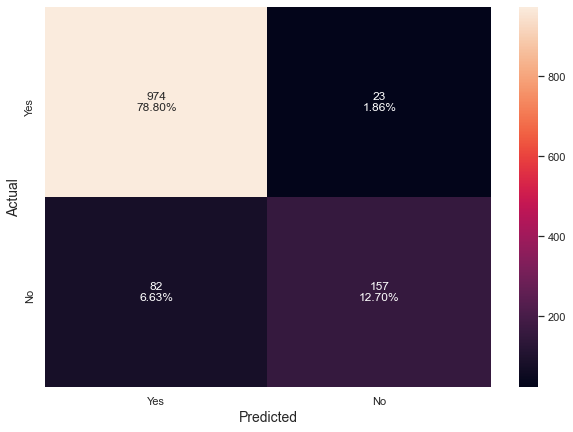

In [100]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier, y_test)

In [101]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(25, 100, 25),
    "scale_pos_weight": [2, 5, 7, 9],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2, 0.4, 0.8, 1],
    "colsample_bytree": [0.7, 0.8, 0.9, 1],
    "colsample_bylevel": [0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=75, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=9, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.999653,0.915049,1.0,0.790795,0.998205,0.77459,0.999102,0.782609


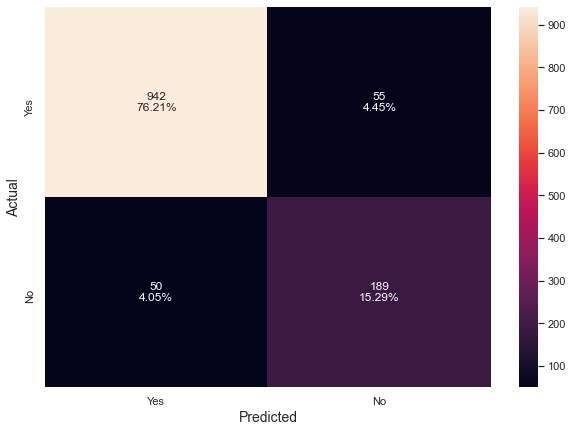

In [102]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned, y_test)

<a id=stacking></a>
## <span style="color:blue">Stacking Model</span>
<div style="text-align:right"><a href=#top>top</a></div>

In [103]:
estimators = [
    ('Bagging Classifier', bagging_estimator_tuned),
    ('Random Forest', rf_tuned), 
    ('Gradient Boosting', gbc_tuned), 
    ('Decision Tree', dtree_estimator),
    ('AdaBoost Classifier', abc_tuned)
]
final_estimator = xgb_tuned
stacking_classifier= StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging Classifier',
                                BaggingClassifier(max_features=0.9,
                                                  max_samples=0.9,
                                                  n_estimators=40,
                                                  random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.8,
                                                                     1: 0.2},
                                                       max_depth=25,
                                                       max_features=None,
                                                       n_estimators=50,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(i

Metric,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Score,0.998613,0.916667,1.0,0.807531,0.992857,0.772,0.996416,0.789366


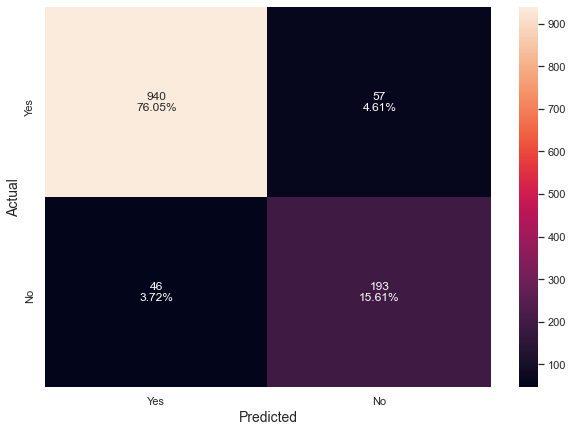

In [104]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier, y_test)

<a id=comparing></a>
## <span style="color:blue">Comparing Models</span>
<div style="text-align:right"><a href=#top>top</a></div>

In [105]:
# defining list of models
models = [
    d_tree, dtree_estimator, 
    rf_estimator, rf_tuned, 
    bagging_classifier, bagging_estimator_tuned,
    abc, abc_tuned, 
    gb_classifier, gbc_tuned, 
    xgb_classifier, xgb_tuned, 
    stacking_classifier
]

model_names = [
    'Decision Tree', 'Tuned Decision Tree',                              
    'Random Forest', 'Tuned Random Forest', 
    'Bagging Classifier',
    'Bagging Classifier Tuned',
    'AdaBoost Classifier', 'Tuned AdaBoost Classifier',
    'Gradient Boosting Classifier','Tuned Gradient Boosting Classifier',
    'XGBoost Classifier', 'Tuned XGBoost Classifier', 
    'Stacking Classifier'
]

results = []
for model, name in zip(models, model_names):
    (acc_train, acc_test,
     recall_train, recall_test,
     precision_train, precision_test,
     f1_train, f1_test) = get_metrics_score(model, False)
    
    results.append((name, acc_train, acc_test, recall_train, recall_test,
                    precision_train, precision_test, f1_train, f1_test))

In [106]:
cols = [
    'Model', 'Train Acc', 'Test Accuracy', 'Train Recall', 
    'Test Recall', 'Train Precision', 'Test Precision', 
    'Train F1-Score', 'Test F1-Score'
]

comparison_frame = pd.DataFrame.from_records(results, columns=cols, index='Model') 

# Sorting models in decreasing order of test f1-score
comparison_frame.sort_values(by='Test F1-Score', ascending=False)

,Train Acc,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-Score,Test F1-Score
Model,,,,,,,,
Stacking Classifier,0.998613,0.916667,1.000000,0.807531,0.992857,0.772000,0.996416,0.789366
Tuned XGBoost Classifier,0.999653,0.915049,1.000000,0.790795,0.998205,0.774590,0.999102,0.782609
Tuned Random Forest,1.000000,0.917476,1.000000,0.656904,1.000000,0.887006,1.000000,0.754808
XGBoost Classifier,1.000000,0.915049,1.000000,0.656904,1.000000,0.872222,1.000000,0.749403
Tuned AdaBoost Classifier,1.000000,0.913430,1.000000,0.598326,1.000000,0.928571,1.000000,0.727735
Decision Tree,1.000000,0.892395,1.000000,0.719665,1.000000,0.722689,1.000000,0.721174
Bagging Classifier Tuned,0.999307,0.911812,0.996403,0.577406,1.000000,0.945205,0.998198,0.716883
Bagging Classifier,0.995839,0.907767,0.978417,0.598326,1.000000,0.888199,0.989091,0.715000
Random Forest,1.000000,0.908576,1.000000,0.556485,1.000000,0.950000,1.000000,0.701847


<a id=conclusion></a>
## <span style="color:blue">Conclusion</span>
<div style="text-align:right"><a href=#top>top</a></div>

- The best model is the Stacking Classifier with an Test F1-Score of 0.79. 
- The Stacking classifier was built using Bagging, AdaBoost, DecisionTree and Random Forest as base estimators and the XGBoost as the final estimator.
- The majority of the customers have not taken the product at 80%. 
- Those customers that have taken the product seem to have lower monthly incomes and are younger on average. 
- The Duration of Pitch is longer on average with those customers that have taken the product.
- Those customers that have taken the product have lower monthly incomes on average.
- Over a quarter of those customers that have taken the product come from city tier 2.
- Duration of pitch versus those who have taken the product is looks to be greatest between the range of 19 to 31.
- Customers purchase products from that sales person who makes more followup visits.
- About 30% of customers purchase the Basic package.
- More that a quarter of of the customers that have taken the product prefer a property rating of 5.
- Most of your customers that have taken the product are un-married.
- Most of your customers that have taken the product make 7 and 8 trips on average.
- Most of your customers that purchased the product have passports.
- 30% of Executives purchase your product. 19.30% Senior Managers purchase the product.
- Salepeople pitch the basic package to those customers with lower monthly incomes.
- Salepeople pitch the basic package to a younger population.